Importy

In [2]:
import numpy as np

from math import log, log2, ceil, pow
from typing import Tuple

Funkcje pomocnicze

In [3]:
def generate_matrix(n_cols: int, n_rows: int):
    # Uniform używa rozkładu jednostajnego ciągłego
    return np.random.uniform(low=0.1, high=0.01, size=(n_rows, n_cols))

In [4]:
generate_matrix(10, 10)

array([[0.02048756, 0.07317859, 0.07488728, 0.01266722, 0.04356071,
        0.03148394, 0.09342073, 0.05035058, 0.0993729 , 0.04005576],
       [0.06119798, 0.09939487, 0.03909567, 0.05139163, 0.0789351 ,
        0.01364536, 0.0451544 , 0.03560414, 0.03171505, 0.05368401],
       [0.03819064, 0.08936765, 0.0906791 , 0.06610749, 0.08731455,
        0.0986205 , 0.05219401, 0.05393204, 0.05047147, 0.0719952 ],
       [0.06552919, 0.01770957, 0.02127113, 0.07839934, 0.01507322,
        0.04428324, 0.03991676, 0.09261331, 0.02184332, 0.09320876],
       [0.05014065, 0.01647014, 0.08801985, 0.04550347, 0.08517095,
        0.05943921, 0.07966046, 0.09896455, 0.08836492, 0.04127784],
       [0.07465359, 0.0864118 , 0.01985034, 0.09480114, 0.03090715,
        0.01751956, 0.05962314, 0.05242505, 0.06687481, 0.09894434],
       [0.04487622, 0.06646563, 0.08013195, 0.08594683, 0.07693243,
        0.0510623 , 0.01591155, 0.03990472, 0.0756664 , 0.01275852],
       [0.03588569, 0.08487175, 0.0570185

In [5]:
class Counter:
    """
    Zliczanie wykonywanych operacji zmiennoprzecinkowych
    """
    def __init__(self) -> None:
        self.operation_counter = 0

    def count_operations(func):
        def wrapper(self, *args, **kwargs):
            A, B = args
            result = func(self, A, B)
            self.operation_counter += A.size
            return result
        return wrapper
    
    @count_operations
    def add(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A + B

    @count_operations
    def sub(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A - B

    @count_operations
    def mul(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A * B

    @count_operations
    def div(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A / B

    def print_counts(self) -> None:
        print(f"Number of flops: {self.operation_counter}")

Test

In [6]:
counter = Counter()

result = np.zeros([1, 3])

mat1 = np.array([1, 2, 3])
mat2 = np.array([1, 2, 3])
print(mat1)
print(mat2)

result += counter.add(mat1, mat2)

[1 2 3]
[1 2 3]


In [7]:
counter.print_counts()
print(result)

Number of flops: 3
[[2. 4. 6.]]


Funkcje pomocnicze

In [8]:
def resize_matrix_to_2n(A: np.ndarray, B: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Zmiana wielkości macierzy
    """
    size_A: Tuple[int, int] = A.shape
    size_B: Tuple[int, int] = B.shape
    new_height: int = 0
    new_width: int = 0

    # Height
    if size_A[0] > size_B[0]:
        new_height = find_next_power_of_2(size_A[0])
    else:
        new_height = find_next_power_of_2(size_B[0])

    # Width
    if size_A[1] > size_B[1]:
        new_width = find_next_power_of_2(size_A[1])
    else:
        new_width = find_next_power_of_2(size_B[1])

    # Wypełnienie zerami
    new_A = np.pad(
        A, [(0, new_height - size_A[0]), (0, new_width - size_A[1])], mode="constant"
    )
    new_B = np.pad(
        B, [(0, new_height - size_B[0]), (0, new_width - size_B[1])], mode="constant"
    )
    return new_A, new_B

def split(array: np.ndarray, n_rows: int, n_cols: int) -> Tuple:
    """Split a matrix into sub-matrices"""
    r, h = array.shape
    return (
        array.reshape(h // n_rows, n_rows, -1, n_cols)
        .swapaxes(1, 2)
        .reshape(-1, n_rows, n_cols)
    )

def find_next_power_of_2(number: int) -> int:
    """
    Szukanie kolejnej potęgi 2
    """
    return 1 if number == 0 else 2 ** ceil(log2(number))

Metoda tradycyjna

In [9]:
def traditional_method(A: np.ndarray, B: np.ndarray, counter: Counter):
    add = counter.add
    mul = counter.mul
    
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    
    result = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] = add(result[i][j], counter.mul(A[i][k], B[k][j]))
    
    return result


In [10]:
A = generate_matrix(5, 5)
B = generate_matrix(5, 5)

print(A)
print(B)

counter = Counter()

result_trad = traditional_method(A, B, counter)
result_numpy = A @ B

print(result_trad)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_trad, result_numpy)}")

[[0.02636207 0.06650458 0.07574876 0.04171637 0.02498195]
 [0.04632444 0.02195091 0.07884295 0.02705621 0.05394723]
 [0.01706347 0.03174219 0.04591549 0.07970869 0.05756292]
 [0.02789136 0.05719917 0.03047754 0.08212854 0.01458759]
 [0.08095864 0.05152414 0.02325028 0.05193805 0.04702991]]
[[0.0992271  0.09749504 0.01317164 0.01252925 0.01812092]
 [0.08955902 0.04154977 0.07136437 0.07851907 0.06940737]
 [0.08557724 0.06899847 0.09214873 0.09958419 0.08436272]
 [0.04540617 0.05786281 0.01774601 0.02932285 0.07245919]
 [0.06258188 0.04162579 0.03832792 0.06822054 0.07486148]]
[[0.01851189 0.01401369 0.01377125 0.01602308 0.01637691]
 [0.01791434 0.01467965 0.01198978 0.01462916 0.01501344]
 [0.01568694 0.01315885 0.01034185 0.01354288 0.01647078]
 [0.01514052 0.01255819 0.00927439 0.01127918 0.01408964]
 [0.01993897 0.01660105 0.00961008 0.01210672 0.01428877]]
[[0.01851189 0.01401369 0.01377125 0.01602308 0.01637691]
 [0.01791434 0.01467965 0.01198978 0.01462916 0.01501344]
 [0.0156869

Algorytm Bineta

In [11]:
def binet_core_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    add = counter.add
    mul = counter.mul
    
    if A.size > 1:
        split_at = A.shape[0] // 2
        A11, A12, A21, A22 = split(A, split_at, split_at)
        B11, B12, B21, B22 = split(B, split_at, split_at)

        C11 = add(
            binet_core_algorithm(A11, B11, counter),
            binet_core_algorithm(A12, B21, counter),
        )
        C12 = add(
            binet_core_algorithm(A11, B12, counter),
            binet_core_algorithm(A12, B22, counter),
        )     
        C21 = add(
            binet_core_algorithm(A21, B11, counter),
            binet_core_algorithm(A22, B21, counter),
        )
        
        C22 = add(
            binet_core_algorithm(A21, B12, counter),
            binet_core_algorithm(A22, B22, counter),
        )

        return np.concatenate(
            [np.concatenate([C11, C12], axis=1), np.concatenate([C21, C22], axis=1)],
            axis=0,
        )
    
    else:
        return mul(A, B)

def binet_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    new_A, new_B = resize_matrix_to_2n(A, B)
    C = binet_core_algorithm(new_A, new_B, counter)
    C = C[~np.all(C == 0, axis=1)]
    C = C[:, ~np.all(C == 0, axis=0)]
    return C
    

Test algorytmu Bineta

In [12]:
A = generate_matrix(5, 5)
B = generate_matrix(5, 5)

print(A)
print(B)

counter = Counter()

result_binet = binet_algorithm(A, B, counter)
result_numpy = A @ B

print(result_binet)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_binet, result_numpy)}")

[[0.04872124 0.03562613 0.04692897 0.04243675 0.02679173]
 [0.06004526 0.02789424 0.01277524 0.08791099 0.07669537]
 [0.0212381  0.04864668 0.02535683 0.03690529 0.01510013]
 [0.09126622 0.09227132 0.01838232 0.08135846 0.07125156]
 [0.04221472 0.03682445 0.02135209 0.08212597 0.01315269]]
[[0.02038952 0.08867884 0.09993289 0.0862256  0.08126491]
 [0.09892434 0.09998095 0.07717427 0.01735585 0.0639217 ]
 [0.02802624 0.01704861 0.09332101 0.02760933 0.02722014]
 [0.03077038 0.01031763 0.06096494 0.03289272 0.09905449]
 [0.06566144 0.08233194 0.06458744 0.08398259 0.07190227]]
[[0.00889792 0.01132621 0.0163153  0.00976092 0.01364396]
 [0.01208274 0.01555295 0.01965846 0.01534699 0.02123291]
 [0.00808312 0.00880341 0.01146819 0.00585772 0.01026708]
 [0.01868585 0.02433786 0.02751889 0.01863845 0.02699732]
 [0.00849266 0.00971955 0.01490944 0.00867457 0.01544632]]
[[0.00889792 0.01132621 0.0163153  0.00976092 0.01364396]
 [0.01208274 0.01555295 0.01965846 0.01534699 0.02123291]
 [0.0080831

Algorytm Strassena

In [13]:
def strassen_core_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    add = counter.add
    sub = counter.sub
    mul = counter.mul

    if A.size > 1:
        split_at = A.shape[0] // 2
        A11, A12, A21, A22 = split(A, split_at, split_at)
        B11, B12, B21, B22 = split(B, split_at, split_at)

        P1 = strassen_core_algorithm(add(A11, A22), add(B11, B22), counter)
        P2 = strassen_core_algorithm(add(A21, A22), B11, counter)
        P3 = strassen_core_algorithm(A11, sub(B12, B22), counter)
        P4 = strassen_core_algorithm(A22, sub(B21, B11), counter)
        P5 = strassen_core_algorithm(add(A11, A12), B22, counter)
        P6 = strassen_core_algorithm(sub(A21, A11), add(B11, B12), counter)
        P7 = strassen_core_algorithm(sub(A12, A22), add(B21, B22), counter)

        C11 = add(sub(add(P1, P4), P5), P7)
        C12 = add(P3, P5)
        C21 = add(P2, P4)
        C22 = add(add(sub(P1, P2), P3), P6)

        return np.concatenate(
                    [np.concatenate([C11, C12], axis=1), np.concatenate([C21, C22], axis=1)],
                    axis=0,
                )
    else:
        return mul(A, B)

def strassen_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    new_A, new_B = resize_matrix_to_2n(A, B)
    C = strassen_core_algorithm(new_A, new_B, counter)
    C = C[~np.all(C == 0, axis=1)]
    C = C[:, ~np.all(C == 0, axis=0)]
    return C
    

Test algorytmu Strassena

In [14]:
A = generate_matrix(2, 2)
B = generate_matrix(2, 2)

print(A)
print(B)

counter = Counter()

result_strassen = strassen_algorithm(A, B, counter)
result_numpy = A @ B

print(result_strassen)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_strassen, result_numpy)}")

counter.print_counts()

[[0.07684033 0.05421408]
 [0.04341572 0.04408721]]
[[0.02726801 0.07786187]
 [0.04387846 0.08326249]]
[[0.00447411 0.01049693]
 [0.00311834 0.00705124]]
[[0.00447411 0.01049693]
 [0.00311834 0.00705124]]
Are the results close: True
Number of flops: 25


In [15]:
import matplotlib.pyplot as plt
from time import time
from matplotlib.ticker import FormatStrFormatter
from typing import List
from tqdm import tqdm

times_trad: List[float] = []
times_binet: List[float] = []
times_strassen: List[float] = []

flops_trad: List[int] = []
flops_binet: List[int] = []
flops_strassen: List[int] = []

power_basis = list(range(2, 10))
powers = [2**k for k in power_basis]

np.random.seed(42)

In [16]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    traditional_method(A, B, counter)

    total_time: float = time() - start_time

    times_trad.append(total_time)
    flops_trad.append(counter.operation_counter)

100%|██████████| 8/8 [03:25<00:00, 25.68s/it]


268435456


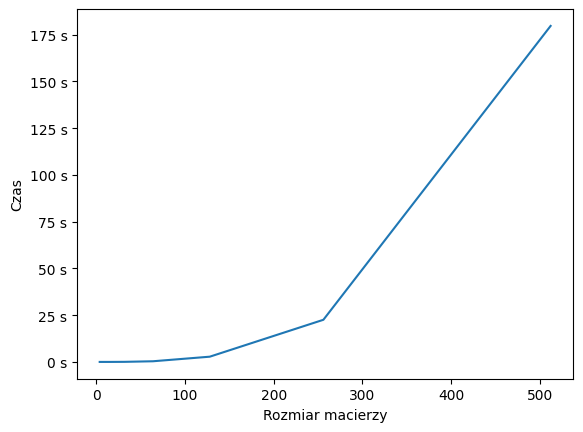

In [17]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_trad)

print(counter.operation_counter)

In [18]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    binet_algorithm(A, B, counter)

    total_time: float = time() - start_time

    times_binet.append(total_time)
    flops_binet.append(counter.operation_counter)

100%|██████████| 8/8 [07:08<00:00, 53.53s/it]


268173312


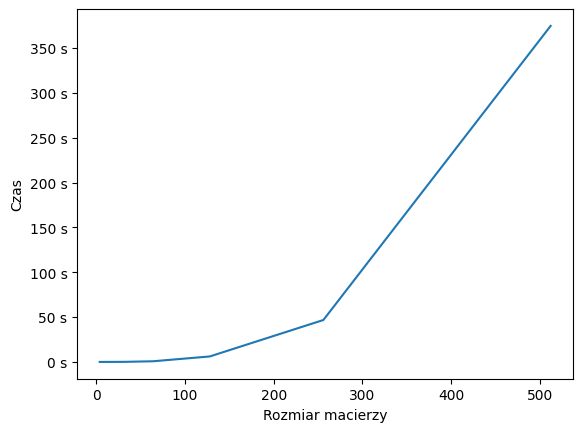

In [19]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_binet)

print(counter.operation_counter)

In [20]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    strassen_algorithm(A, B, counter)

    total_time: float = time() - start_time

    times_strassen.append(total_time)
    flops_strassen.append(counter.operation_counter)

100%|██████████| 8/8 [03:55<00:00, 29.46s/it]


In [21]:
print(times_strassen)

[0.0027573108673095703, 0.005704641342163086, 0.01666092872619629, 0.08771181106567383, 0.5952401161193848, 4.148430347442627, 29.262978315353394, 201.56494140625]


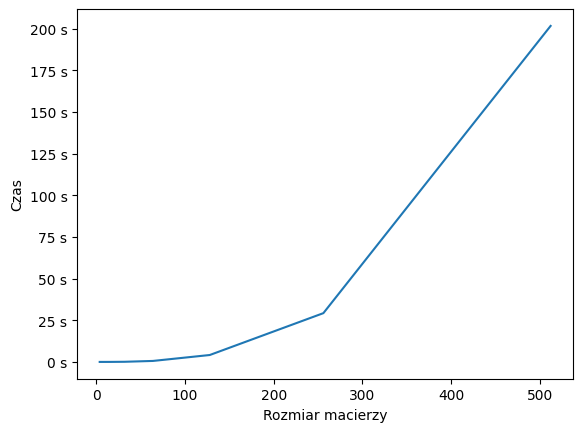

In [22]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_strassen)


In [26]:
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą tradycyjną: {times_trad[-1]:.2f} sekund")
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Bineta: {times_binet[-1]:.2f} sekund")
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Strassena: {times_strassen[-1]:.2f} sekund")

Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą tradycyjną: 177.09 sekund
Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą Bineta: 378.46 sekund
Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą Strassena: 208.07 sekund


In [27]:
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą tradycyjną: {flops_trad[-1]}")
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Bineta: {flops_binet[-1]}")
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Strassena: {flops_strassen[-1]}")

Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą tradycyjną: 268435456
Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą Bineta: 268173312
Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą Strassena: 280902385
